In [1]:
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm

from tensorflow.keras.preprocessing.image import ImageDataGenerator


from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

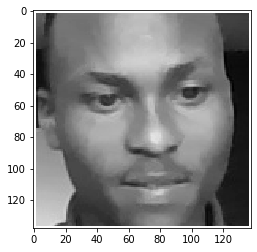

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

base_dir = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/train'

CATEGORIES = ["keith", "martin","keithmartin", "jay", "rodney", "florence", "denzel", "sylvia", "albert", "luidgi"]

for category in CATEGORIES:
    path = os.path.join(base_dir, category) #with the iterator named cartegory we are able to loop over files of diffrent people.
    for img in os.listdir(path):  # gets the images of diffrent people store in diffrent folders
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # shows the image in a scale
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [4]:
print(img_array)


[[255 254 254 ... 255 254 255]
 [255 251 255 ... 255 255 254]
 [254 255  97 ...  65  64 254]
 ...
 [255 255 211 ...  40  39 255]
 [255 254 213 ...  41  40 255]
 [253 255 251 ... 254 255 253]]


In [5]:
print(img_array.shape)

(138, 138)


#### Resizing the images

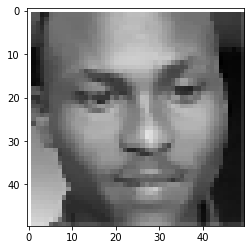

In [6]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []  

def create_training_data():
    for category in CATEGORIES: 

        path = os.path.join(base_dir, category)  # create path to diffrent folders of diffrent people that we want to use for the training set
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each images of diffrent people in diffrent folders
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 6/6 [00:00<00:00, 298.21it/s]

222


In [8]:
import random

random.shuffle(training_data)

In [9]:
for sample in training_data[:10]:
    print(sample[1])

2
3
4
4
1
2
1
6
2
4


In [10]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
    

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)


[[[[251]
   [255]
   [254]
   ...
   [252]
   [255]
   [255]]

  [[255]
   [105]
   [105]
   ...
   [ 81]
   [ 80]
   [ 91]]

  [[255]
   [106]
   [106]
   ...
   [ 70]
   [ 65]
   [ 81]]

  ...

  [[254]
   [204]
   [204]
   ...
   [ 41]
   [ 40]
   [ 51]]

  [[255]
   [211]
   [211]
   ...
   [ 41]
   [ 40]
   [ 51]]

  [[251]
   [215]
   [215]
   ...
   [ 54]
   [ 51]
   [ 63]]]]


In [11]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [12]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [16]:
z = X.shape[1:]

In [17]:
y.shape

(222,)

In [ ]:
img_height = img_width = 100
channels = 3

In [ ]:
 path = os.path.join(base_dir, category) #with the iterator named cartegory we are able to loop over files of diffrent people.
    for img in os.listdir(path)

## Transfer Learning

In [3]:
from tensorflow import keras
from tensorflow.keras import applications

#img_height = img_width = 100 
#channels = 3


datagen = ImageDataGenerator(rescale=1.0/255)
model = applications.VGG16(include_top=False, weights='imagenet')           #input_shape=(img_width, img_height, channels)

58892288/58889256 [==============================] - 175s 3us/step


#### Testing the loaded model

In [18]:
from keras.applications.vgg19 import preprocess_input
from keras.preprocessing import image
import numpy as np

base_dirr = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/train/keith'



img_path = os.path.join(base_dirr, 'keith,9012.13.jpg')

img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)


#prediction = prediction.data.numpy().argmax()  # Our prediction will be the index of the class label with the largest value.
#print labels[prediction]

features = model.predict(x)
features

ValueError: Error when checking input: expected conv2d_input to have shape (50, 50, 1) but got array with shape (224, 224, 3)

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=50, validation_split=0.8)

Train on 44 samples, validate on 178 samples
Epoch 1/50
44/44 [==============================] - 4s 82ms/sample - loss: 16.1246 - accuracy: 0.1591 - val_loss: 15.9551 - val_accuracy: 0.1180
Epoch 2/50
44/44 [==============================] - 2s 53ms/sample - loss: 13.8409 - accuracy: 0.1136 - val_loss: 15.9551 - val_accuracy: 0.1180
Epoch 3/50
44/44 [==============================] - 2s 53ms/sample - loss: 13.8409 - accuracy: 0.1136 - val_loss: 15.9551 - val_accuracy: 0.1180
Epoch 4/50
44/44 [==============================] - 2s 50ms/sample - loss: 13.8409 - accuracy: 0.1136 - val_loss: 15.9551 - val_accuracy: 0.1180
Epoch 5/50
44/44 [==============================] - 2s 50ms/sample - loss: 13.8409 - accuracy: 0.1136 - val_loss: 15.9551 - val_accuracy: 0.1180
Epoch 6/50
44/44 [==============================] - 2s 50ms/sample - loss: 13.8409 - accuracy: 0.1136 - val_loss: 15.9551 - val_accuracy: 0.1180
Epoch 7/50
44/44 [==============================] - 2s 50ms/sample - loss: 13.8409 - 

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 256)       2560      
_________________________________________________________________
activation (Activation)      (None, 48, 48, 256)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 256)       590080    
_________________________________________________________________
activation_1 (Activation)    (None, 22, 22, 256)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 256)       0

In [14]:
model.save('attendancefacialmodel')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: attendancefacialmodel/assets


 # Ignore this part

In [49]:
import cv2
import tensorflow as tf

CATEGORIES = ["keith", "martin","keithmartin", "jay", "rodney", "florence", "denzel", "slyvia", "albert", "luidgi"]

def prepare(filepath):
    IMG_SIZE = 50  
    img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [50]:
model = tf.keras.models.load_model("attendancefacialmodel")

In [56]:
base_dir = '/home/tech-iguana/Documents/facial_stuff/tf_facial_model/images/test'

img = os.path.join(base_dir,'martin,2019.5.jpg') 

IMG_SIZE = 50  
img_array = cv2.imread(img, cv2.IMREAD_GRAYSCALE)
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))

prediction = model.predict([prepare('new_array')])

#return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)



#print(prediction)  # will be a list in a list.
#print(CATEGORIES[int(prediction[0][0])]

ValueError: Python inputs incompatible with input_signature:
  inputs: (
    Tensor("IteratorGetNext:0", shape=(None, 50, 50, 1), dtype=uint8))
  input_signature: (
    TensorSpec(shape=(None, None, None, 1), dtype=tf.float32, name=None))